In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import your libraries here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [4]:
#Load the dataset and explore its variables


#social = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LABS/Módulo 3/lab-unsupervised-learning-deepdive-master/snsdata.csv')
social = pd.read_csv('snsdata.csv')

In [5]:
social.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [6]:
social.dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

In [7]:
social.describe().T

,count,mean,std,min,25%,50%,75%,max
gradyear,30000.0,2007.500000,1.118053,2006.000,2006.750,2007.500,2008.250,2009.000
age,24914.0,17.993950,7.858054,3.086,16.312,17.287,18.259,106.927
friends,30000.0,30.179467,36.530877,0.000,3.000,20.000,44.000,830.000
basketball,30000.0,0.267333,0.804708,0.000,0.000,0.000,0.000,24.000
football,30000.0,0.252300,0.705357,0.000,0.000,0.000,0.000,15.000
soccer,30000.0,0.222767,0.917226,0.000,0.000,0.000,0.000,27.000
softball,30000.0,0.161200,0.739707,0.000,0.000,0.000,0.000,17.000
volleyball,30000.0,0.143133,0.639943,0.000,0.000,0.000,0.000,14.000
swimming,30000.0,0.134400,0.516990,0.000,0.000,0.000,0.000,31.000
cheerleading,30000.0,0.106633,0.514333,0.000,0.000,0.000,0.000,9.000


In [8]:
social.shape

(30000, 40)

In [9]:
social.gender.isnull().sum()/social.shape[0]

#We are gonna assign NA to 'Other', since we are limitating only to two genders

0.0908

In [10]:
social.age.isnull().sum()/social.shape[0]

#Because of the high ratio of missing values at age column, we are gonna assign it too to 'Unspecified'

0.16953333333333334

In [11]:
null_cols = social.isnull().sum()
null_cols[null_cols > 0]

gender    2724
age       5086
dtype: int64

In [12]:
#Things that need to be fixed:

#Change the values of gender and age.
#Check outliers
#Just to be sure, strip the columns, so we do not have spaces

#Keep going with the lesson

## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

##Handle Nan

In [13]:
#Your code here:

social["age"].fillna(0, inplace = True)
social["gender"].fillna("Other", inplace = True)

social[['gender','age']].isnull().sum()

#Great! There aren't more missing values and we didn't need to drop & lose info. 


gender    0
age       0
dtype: int64

##Strip column names

In [14]:
social.columns = social.columns.str.replace(' ', '')
social.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

In [15]:
#Your code here:




##Checking correlations

<AxesSubplot:title={'center':'Triangle Correlation Heatmap'}>

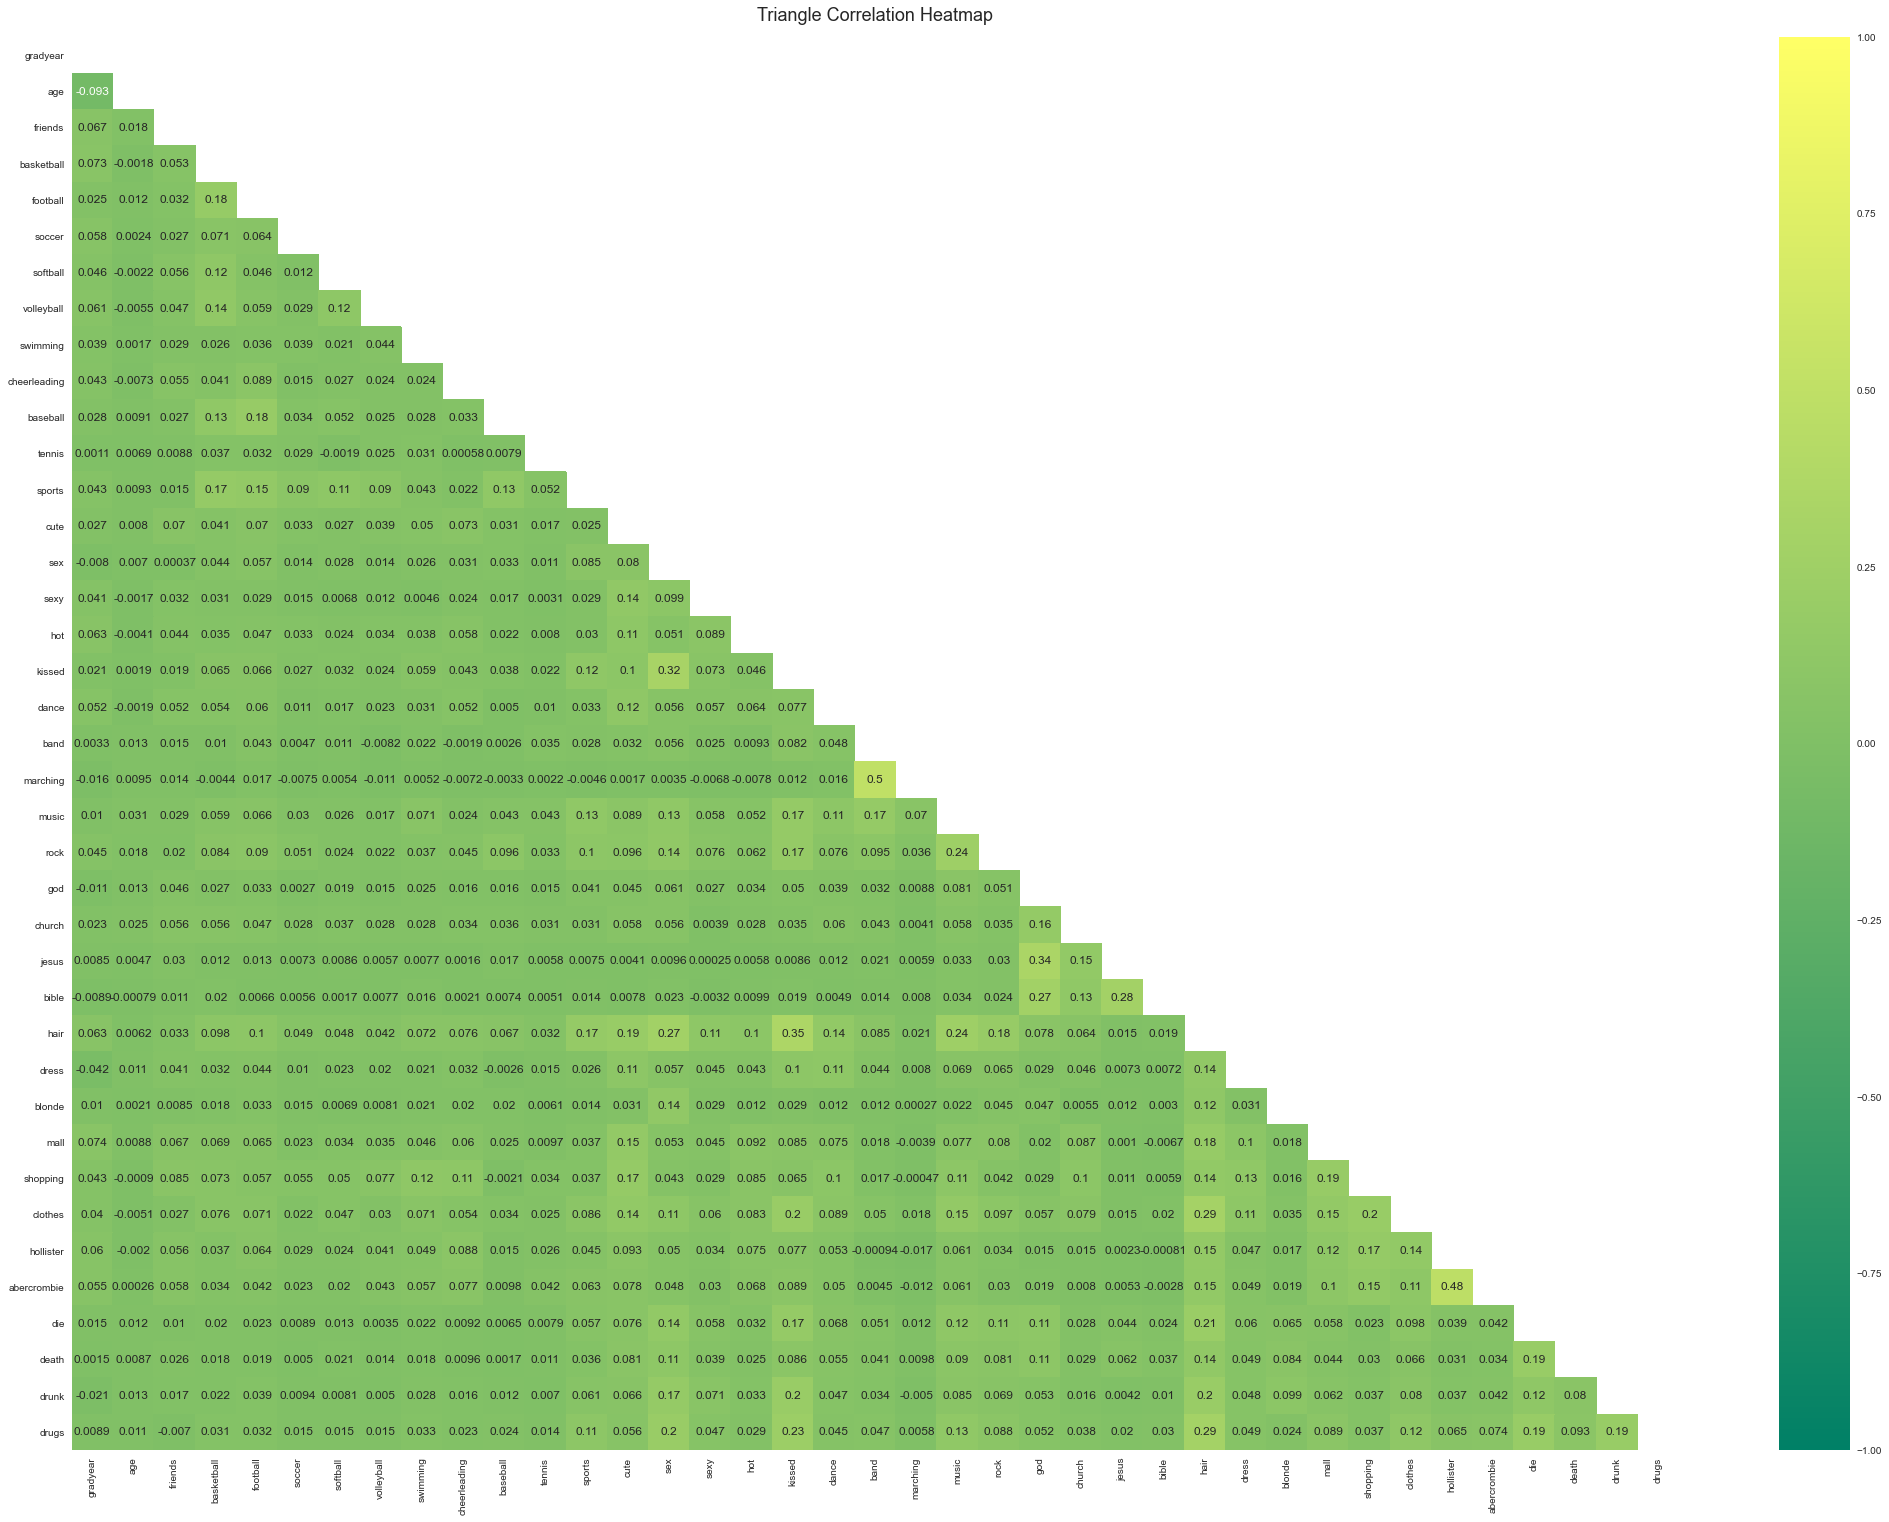

In [16]:
def correlation_plot (dataset):
  
  corr_plot=dataset.corr()
  plt.figure(figsize=(36, 26))
  mask = np.triu(np.ones_like(corr_plot, dtype=np.bool))
  heatmap = sns.heatmap(corr_plot, mask=mask, vmin=-1, vmax=1, annot=True, cmap='summer')
  heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
  return heatmap

correlation_plot(social)

In [17]:
#Even we cannot appreciate a high columns correlation, we are going to apply a 
#function to delete the columns that are highly correlated. We are going to drop
#columns with more than 90% of correlation.

len(list(social.columns))

40

In [18]:
# Your code here
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [19]:
correlation(social,0.9)

len(list(social.columns))

40

In [20]:
#As we expected, there aren´t deleted columns because of the correlation values!

In [21]:
social.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

##Checking if there are any outliers

##Fixing some things before plot...

In [22]:
social['age']=social.age.round(decimals=0)

columnillas = list(social.columns)

<AxesSubplot:xlabel='drugs'>

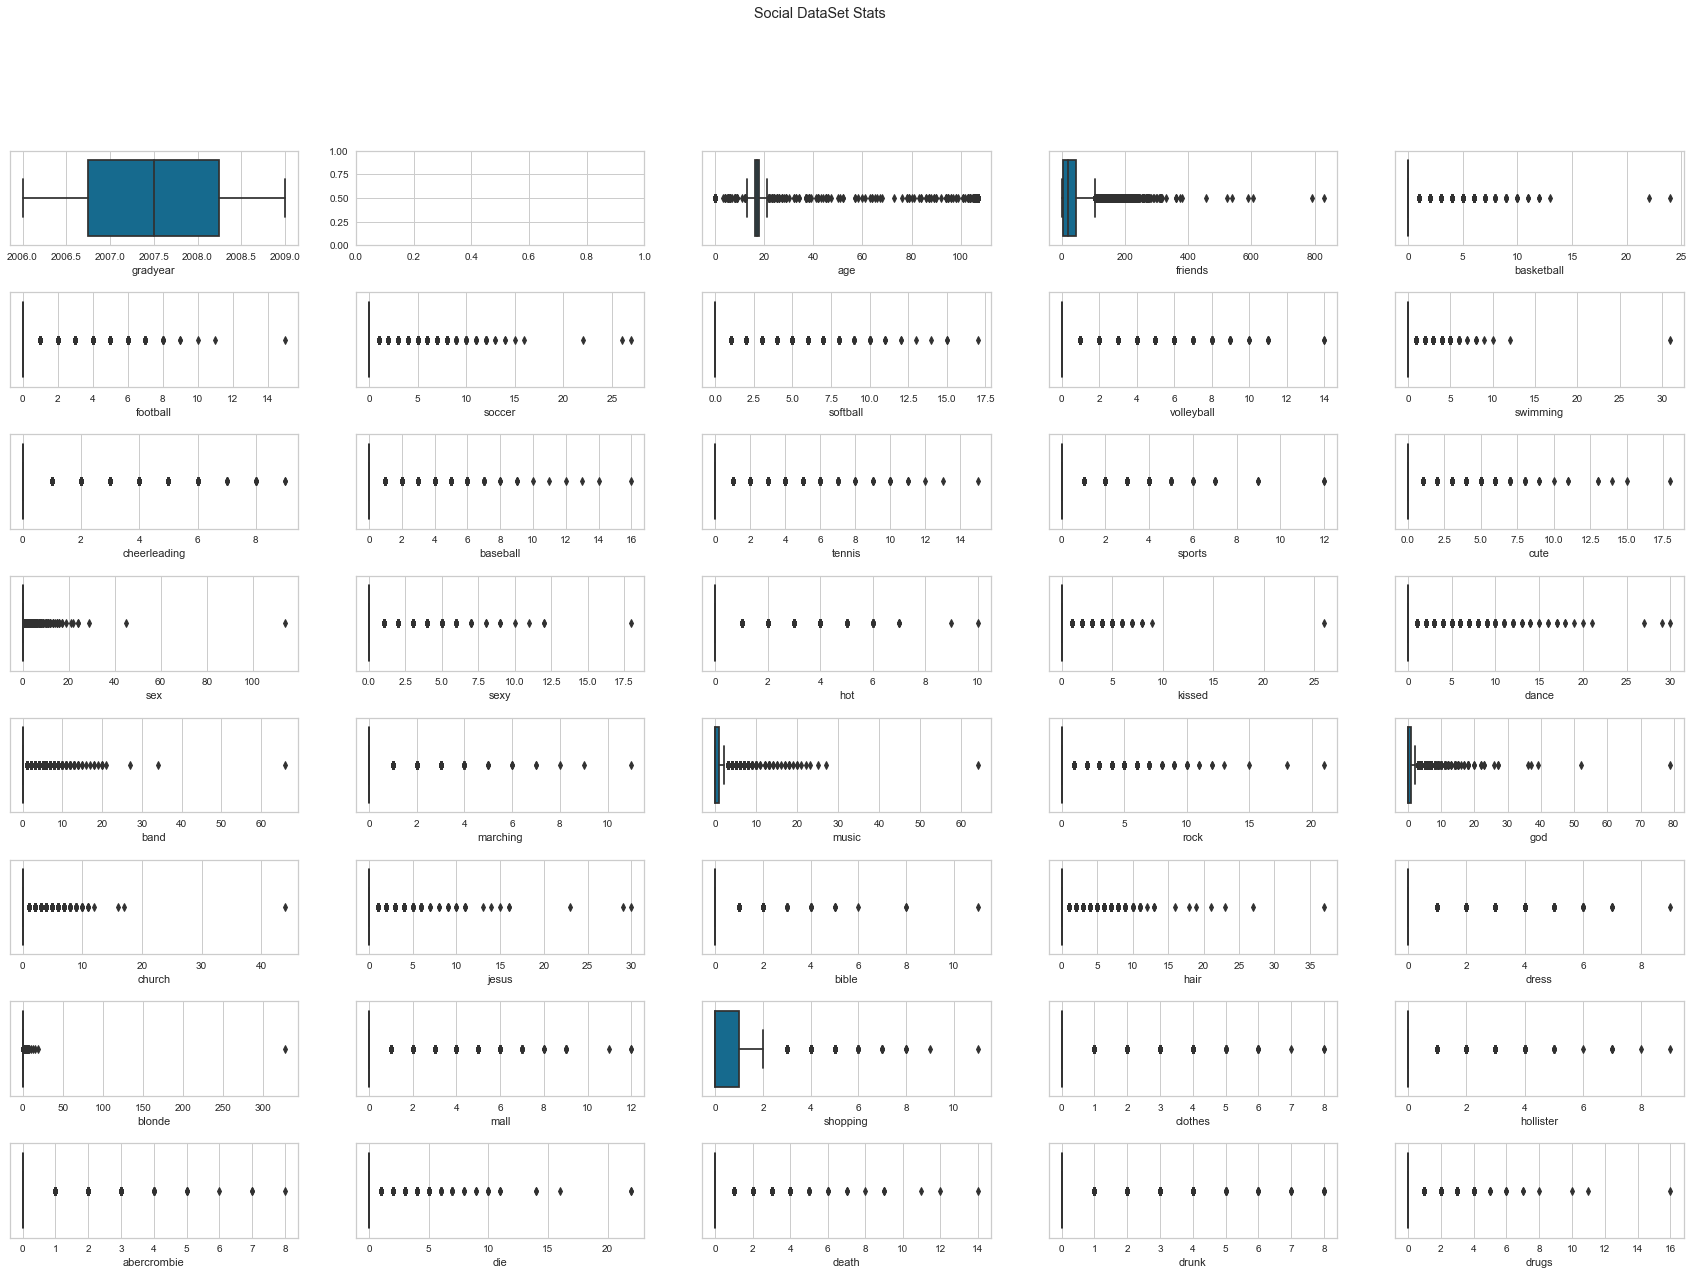

In [23]:
fig, axes = plt.subplots(8, 5, figsize=(30, 20))
customers=social
fig.suptitle('Social DataSet Stats')
plt.subplots_adjust(hspace = 0.5)

sns.boxplot(ax=axes[0, 0], data=customers, x=columnillas[0])
#sns.boxplot(ax=axes[0, 1], data=customers, x=columnillas[1])
sns.boxplot(ax=axes[0, 2], data=customers, x=columnillas[2])
sns.boxplot(ax=axes[0, 3], data=customers, x=columnillas[3])
sns.boxplot(ax=axes[0, 4], data=customers, x=columnillas[4])

sns.boxplot(ax=axes[1, 0], data=customers, x=columnillas[5])
sns.boxplot(ax=axes[1, 1], data=customers, x=columnillas[6])
sns.boxplot(ax=axes[1, 2], data=customers, x=columnillas[7])
sns.boxplot(ax=axes[1, 3], data=customers, x=columnillas[8])
sns.boxplot(ax=axes[1, 4], data=customers, x=columnillas[9])


sns.boxplot(ax=axes[2, 0], data=customers, x=columnillas[10])
sns.boxplot(ax=axes[2, 1], data=customers, x=columnillas[11])
sns.boxplot(ax=axes[2, 2], data=customers, x=columnillas[12])
sns.boxplot(ax=axes[2, 3], data=customers, x=columnillas[13])
sns.boxplot(ax=axes[2, 4], data=customers, x=columnillas[14])

sns.boxplot(ax=axes[3, 0], data=customers, x=columnillas[15])
sns.boxplot(ax=axes[3, 1], data=customers, x=columnillas[16])
sns.boxplot(ax=axes[3, 2], data=customers, x=columnillas[17])
sns.boxplot(ax=axes[3, 3], data=customers, x=columnillas[18])
sns.boxplot(ax=axes[3, 4], data=customers, x=columnillas[19])

sns.boxplot(ax=axes[4, 0], data=customers, x=columnillas[20])
sns.boxplot(ax=axes[4, 1], data=customers, x=columnillas[21])
sns.boxplot(ax=axes[4, 2], data=customers, x=columnillas[22])
sns.boxplot(ax=axes[4, 3], data=customers, x=columnillas[23])
sns.boxplot(ax=axes[4, 4], data=customers, x=columnillas[24])

sns.boxplot(ax=axes[5, 0], data=customers, x=columnillas[25])
sns.boxplot(ax=axes[5, 1], data=customers, x=columnillas[26])
sns.boxplot(ax=axes[5, 2], data=customers, x=columnillas[27])
sns.boxplot(ax=axes[5, 3], data=customers, x=columnillas[28])
sns.boxplot(ax=axes[5, 4], data=customers, x=columnillas[29])


sns.boxplot(ax=axes[6, 0], data=customers, x=columnillas[30])
sns.boxplot(ax=axes[6, 1], data=customers, x=columnillas[31])
sns.boxplot(ax=axes[6, 2], data=customers, x=columnillas[32])
sns.boxplot(ax=axes[6, 3], data=customers, x=columnillas[33])
sns.boxplot(ax=axes[6, 4], data=customers, x=columnillas[34])

sns.boxplot(ax=axes[7, 0], data=customers, x=columnillas[35])
sns.boxplot(ax=axes[7, 1], data=customers, x=columnillas[36])
sns.boxplot(ax=axes[7, 2], data=customers, x=columnillas[37])
sns.boxplot(ax=axes[7, 3], data=customers, x=columnillas[38])
sns.boxplot(ax=axes[7, 4], data=customers, x=columnillas[39])

In [24]:
#After looking our data plots, I conclude that there are a lot of outliers to be
#treated. 


#But first lets check how many rows we would have to drop to be sure if its necessary
#To manage in other way this outliers.

###This is to build our outlier function to remove outliers

In [25]:
#Copy de dataframe, because we are not tontos 

social_outliers = social.sample(n=300, random_state=1)
social_outliers.head(5)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
10747,2007,F,17.0,6,0,0,7,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12573,2007,F,17.0,6,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
29676,2009,F,15.0,91,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8856,2007,F,18.0,85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21098,2008,F,0.0,36,1,0,0,1,1,1,...,0,1,2,1,0,0,3,0,1,3


In [26]:
Q1 = social_outliers.quantile(0.25)
Q3 = social_outliers.quantile(0.75)
#Q1,Q3

In [27]:
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

#lower_limit,upper_limit

In [28]:
df_out = social_outliers[~((social_outliers < (lower_limit)) |(social_outliers > (upper_limit))).any(axis=1)]
print(df_out.shape)

(18, 40)


In [29]:
social.shape

(30000, 40)

In [30]:
##Seems a lot of data lost! Better try to train our models like it is.

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [31]:
#Your code here:


##First of all I am going to label the age column creating a new one called 
##age_range. Which is going to be divided in 4 gruops

In [32]:
social.astype({'age':'float'}).dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

In [33]:
social.dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

In [34]:
social.age.value_counts()

17.0     6500
18.0     6345
16.0     5881
0.0      5086
19.0     4036
         ... 
97.0        1
66.0        1
60.0        1
44.0        1
102.0       1
Name: age, Length: 81, dtype: int64

In [35]:
#social['age_range']=np.where(social['age']==0,'Unspecified',
 #                   np.where((social['age']<13) & (social['age']>0), 'Kid', 
  #                  np.where((social['age']>=13) & (social['age']<18),'Teenager', 
   #                 np.where(social['age']>=18,'Adult',social['age']))))

In [36]:
#social.age_range.value_counts()

In [37]:
#social = social.drop(columns=['age'])

### Dimension Reducing

In [38]:
social_copy = social.copy()
social_copy.shape

(30000, 40)

In [39]:
social_copy.dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

In [40]:
#no_num_list = ['age_range','gender']

In [41]:
#cols_list = [i for i in social_copy if not in no_num_list]
#cols_list

In [42]:
#social_copy['gender_code']=np.where(social_copy['gender']=='M',0,
 #                   np.where((social_copy['gender']=='F'), 1, 
  #                  np.where((social_copy['gender']=='Other') , 2 ,social_copy['gender'])))
#social_copy = social_copy.drop(columns=['gender'])
#social_copy.gender_code.value_counts()

In [43]:
#social_copy.columns

In [44]:
social_dummy = social_copy.join(pd.get_dummies(social_copy['gender']))
social_dummy = social_dummy.drop(columns=['gender'])
social_dummy.head(5)

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M,Other
0,2006,19.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,19.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,18.0,69,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2006,19.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,19.0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [45]:
social_scaled = StandardScaler().fit_transform(social_dummy)
social_scaled

array([[-1.34164079,  0.41273213, -0.63452768, ..., -1.66597855,
         2.17828495, -0.31601901],
       [-1.34164079,  0.41273213, -0.8261496 , ...,  0.60024783,
        -0.45907676, -0.31601901],
       [-1.34164079,  0.31115903,  1.06269499, ..., -1.66597855,
         2.17828495, -0.31601901],
       ...,
       [ 1.34164079,  0.10801283, -0.8261496 , ..., -1.66597855,
         2.17828495, -0.31601901],
       [ 1.34164079,  0.10801283, -0.8261496 , ..., -1.66597855,
         2.17828495, -0.31601901],
       [ 1.34164079,  0.41273213, -0.74402592, ...,  0.60024783,
        -0.45907676, -0.31601901]])

## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

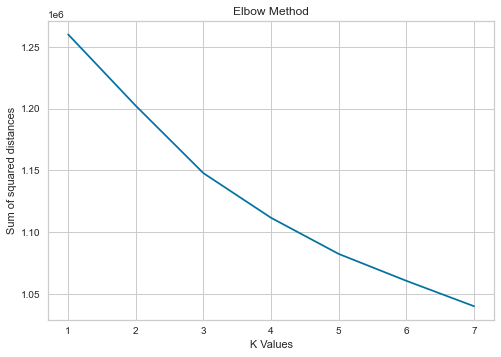

In [48]:
K = range(1,8)
sum_of_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(social_scaled)
  sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method")
plt.show()

In [58]:
#Your code here:
#Im going to try with n_clusters = 3,5 because in both cases we have a change of slope

kmeans_3 = KMeans(n_clusters=3)
kmeans_5 = KMeans(n_clusters=5)
census_clusters_3 = kmeans_3.fit(social_scaled)
census_clusters_5 = kmeans_5.fit(social_scaled)
print(len(census_clusters_3.cluster_centers_))
print(len(census_clusters_5.cluster_centers_))


labels3 = kmeans_3.labels_
labels5 = kmeans_5.labels_

3
5


In [60]:
df_cluster3 = social_copy.assign(Cluster = labels3) 
df_cluster5 = social_copy.assign(Cluster = labels5)

kmeans_3 = df_cluster3.groupby(['Cluster']).mean().round(1)
kmeans_5 = df_cluster5.groupby(['Cluster']).mean().round(1)

kmeans_3

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2007.5,15.7,30.9,0.2,0.2,0.2,0.2,0.1,0.1,0.1,...,0.1,0.2,0.4,0.1,0.0,0.0,0.1,0.1,0.1,0.0
1,2007.8,15.1,39.3,0.7,0.6,0.5,0.4,0.4,0.3,0.3,...,0.5,0.9,0.9,0.7,0.4,0.3,0.7,0.4,0.4,0.4
2,2007.4,13.1,25.0,0.2,0.3,0.2,0.0,0.1,0.1,0.0,...,0.0,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.0


In [61]:
kmeans_5

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2007.4,5.7,25.6,0.1,0.1,0.2,0.1,0.1,0.1,0.1,...,0.1,0.2,0.2,0.1,0.0,0.0,0.1,0.1,0.0,0.0
1,2007.5,15.8,28.9,0.2,0.1,0.2,0.1,0.1,0.1,0.1,...,0.1,0.2,0.3,0.1,0.0,0.0,0.1,0.1,0.1,0.0
2,2007.8,15.3,44.5,0.6,0.5,0.5,0.5,0.5,0.3,0.4,...,0.2,0.8,1.1,0.4,0.3,0.2,0.2,0.2,0.1,0.0
3,2007.6,15.1,30.6,0.6,0.5,0.4,0.3,0.2,0.3,0.2,...,0.8,0.7,0.6,0.8,0.2,0.2,1.2,0.5,0.8,1.0
4,2007.4,16.5,24.6,0.3,0.4,0.2,0.0,0.0,0.1,0.0,...,0.0,0.1,0.0,0.1,0.0,0.0,0.1,0.1,0.1,0.0
